In [46]:
from gensim.models import word2vec


In [45]:
import MeCab
import pickle

In [48]:
class Review:
    def __init__ (self,star,text):
        self.star = star
        self.text = text

In [49]:
with open('../data/processing/reviews.pickle','rb') as f:
    revs = pickle.load(f)

In [9]:
m = MeCab.Tagger ("-Ochasen")

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x1367be908>]],
      dtype=object)

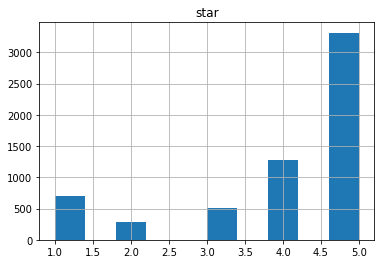

In [80]:
df = pd.DataFrame([r.star for r in revs])
df.columns = ["star"]
df.hist()

In [13]:
for r in revs:
    rev_text = r.text
    mecab_result = m.parse (rev_text)

    words_raw = [i.split() for i in mecab_result.split('\n')]

    words = []
    list_element  = ""
    
    for w in words_raw:
        if len(w)>1:
            words.append(w[0])
        
    list_element  += '__label__' +str(r.star)
    
    for w in words:
        list_element  += ' ' + w
        
    list_element  += '\n' 
        
    path = '../data/processing/train.lst'
    with open(path,mode='a') as f:
        f.write(list_element)
    

In [1]:
!pip install seaborn
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

%matplotlib inline

    100% |████████████████████████████████| 215kB 3.2MB/s ta 0:00:01
You are using pip version 18.1, however version 19.1.1 is available.
You should consider upgrading via the 'pip install --upgrade pip' command.


In [19]:
import collections

In [37]:
words_by_rate = [[],[],[],[],[],[]]
path = '../data/processing/train.lst'
words_and_rate_raw = open(path,'r')
for wa in words_and_rate_raw:
    star = int(wa.split()[0][9])
    words_by_rate[star].extend(wa.split()[1:])

In [42]:
# print(words_by_rate[1][:100])
c = collections.Counter(words_by_rate[2])
print(c.most_common())


[('の', 1522), ('。', 1507), ('が', 1482), ('、', 1154), ('に', 1099), ('て', 1090), ('は', 1066), ('た', 1025), ('で', 789), ('と', 718), ('を', 691), ('し', 618), ('です', 472), ('ない', 423), ('も', 400), ('ます', 392), ('まし', 315), ('な', 315), ('ので', 253), ('か', 247), ('，', 244), ('ん', 228), ('い', 220), ('・', 185), ('さ', 184), ('ませ', 180), ('いる', 167), ('」', 164), ('「', 162), ('する', 155), ('れ', 148), ('思い', 133), ('購入', 129), ('あり', 128), ('から', 125), ('こと', 122), ('だ', 120), ('ある', 118), ('よう', 115), ('う', 111), ('もの', 111), ('この', 103), ('方', 93), ('ば', 87), ('1', 85), ('なく', 82), ('？', 81), ('なっ', 76), ('や', 75), ('なり', 75), ('人', 74), ('でし', 74), ('だけ', 71), ('という', 71), ('なら', 70), ('感じ', 67), ('良い', 66), ('いい', 64), ('まで', 63), ('私', 61), ('なかっ', 61), ('これ', 61), ('ね', 59), ('使用', 58), ('でき', 57), ('たい', 57), ('.', 57), ('たら', 56), ('的', 55), ('その', 55), ('4', 55), ('使っ', 54), ('！', 54), ('たり', 54), ('でしょ', 53), ('時間', 53), ('てる', 52), ('（', 51), ('他', 51), ('）', 48), ('…', 48), ('なる', 47), ('映

In [34]:
pd.DataFrame(words_by_rate)

KeyboardInterrupt: 